In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

Load the Dataset

Assuming you have downloaded the dataset from Kaggle, use the appropriate path to load the CSV file.

In [ ]:
# Replace 'path_to_housing_data.csv' with the actual file path
data = pd.read_csv('Housing.csv')

# View the first few rows to understand the structure of the dataset
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_data/Housing.csv'

Preprocess Data

Before training the model, ensure that there are no missing values and select relevant features.

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Dropping rows with missing values (if any)
data = data.dropna()

# Selecting relevant features (you may modify based on your dataset)
# Features like 'size', 'bedrooms', 'bathrooms', and 'garage' to predict 'price'
X = data[['area', 'bedrooms', 'bathrooms', 'stories']]  # Independent variables (features)
y = data['price']  # Dependent variable (target)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


coorelation

<Axes: >

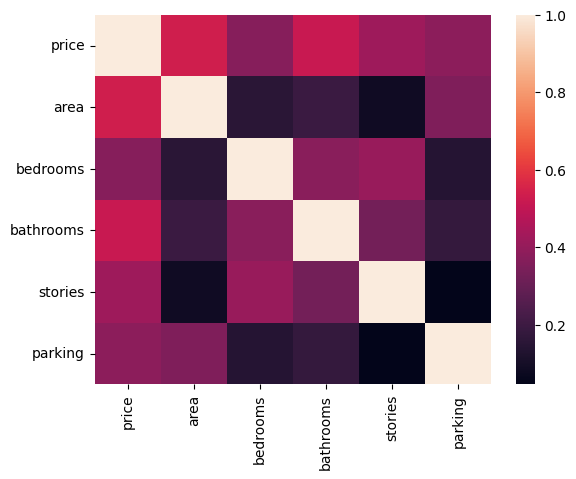

In [ ]:
# Assuming 'data' is your DataFrame
# Select only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=['number'])

# Generate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
sns.heatmap(corr_matrix)

Split the Data into Train and Test Sets

To evaluate the performance of the model, we split the dataset into training and testing sets.

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Linear Regression Model

Next, we train a linear regression model using the training data.

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

Predict House Prices

Once the model is trained, we use it to predict house prices on the test data.

In [ ]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

Now, evaluate the performance of the model using metrics like Root Mean Squared Error (RMSE) and R-squared.
1. Calculating Root Mean Squared Error (RMSE):

python

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

What is Happening:

    mean_squared_error(y_test, y_pred):
        This function from scikit-learn computes the Mean Squared Error (MSE) between the actual values (y_test) and the predicted values (y_pred).
        MSE is the average of the squared differences between the actual and predicted values. Mathematically:
        MSE=1n∑i=1n(Actuali−Predictedi)2
        MSE=n1​i=1∑n​(Actuali​−Predictedi​)2
        y_test: Actual house prices from the test set (true values).
        y_pred: Predicted house prices by the model on the test set.

    np.sqrt(...):
        The square root of the MSE gives you the Root Mean Squared Error (RMSE). RMSE is in the same unit as the target variable (in this case, house prices).
        RMSE=MSE=1n∑i=1n(Actuali−Predictedi)2
        RMSE=MSE

​=n1​i=1∑n​(Actuali​−Predictedi​)2

        ​
        RMSE measures the average magnitude of the error between predicted and actual values. Lower RMSE indicates better model performance.

Why is RMSE important?

    Interpretability: RMSE is easier to interpret because it's in the same unit as the dependent variable (e.g., if house prices are in dollars, RMSE will also be in dollars).
    Penalizes Large Errors: Because of squaring the differences, RMSE penalizes large errors more than small ones.

2. Calculating R-squared (R²):

python

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

What is Happening:

    r2_score(y_test, y_pred):
        This function calculates the R-squared value (also called the coefficient of determination). It tells you how well the model explains the variability of the target variable.
        R-squared is a measure of how well the actual outcomes (y_test) are explained by the predictions (y_pred) made by the model.

R-squared Formula:

Mathematically, R² is calculated as:
R2=1−∑(Actuali−Predictedi)2∑(Actuali−yˉ)2
R2=1−∑(Actuali​−yˉ​)2∑(Actuali​−Predictedi​)2​

Where:

    ∑(Actuali−Predictedi)2∑(Actuali​−Predictedi​)2 is the residual sum of squares (errors made by the model).
    ∑(Actuali−yˉ)2∑(Actuali​−yˉ​)2 is the total sum of squares (total variability in the data).
    yˉyˉ​ is the mean of the actual values.

Interpretation of R²:

    R² = 1: The model perfectly predicts the actual values.
    R² = 0: The model does no better than simply predicting the mean of the actual values.
    R² < 0: The model is doing worse than predicting the mean, meaning it fits the data poorly.

The closer the R² value is to 1, the better the model explains the variance in the target variable.
Summary:

    RMSE tells you how far off the predictions are from the actual values on average.
    R-squared tells you how much of the variance in the actual values is explained by the predictions.

Together, they provide a comprehensive picture of the model's performance:

    RMSE helps you understand the magnitude of prediction errors.
    R-squared helps you understand the goodness of fit.

In [ ]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R-squared to understand the proportion of variance explained
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Root Mean Squared Error (RMSE): 1567718.6106001572
R-squared: 0.513758534903707


Visualize the Results

You can visualize how well the predicted prices compare to the actual prices using a scatter plot.

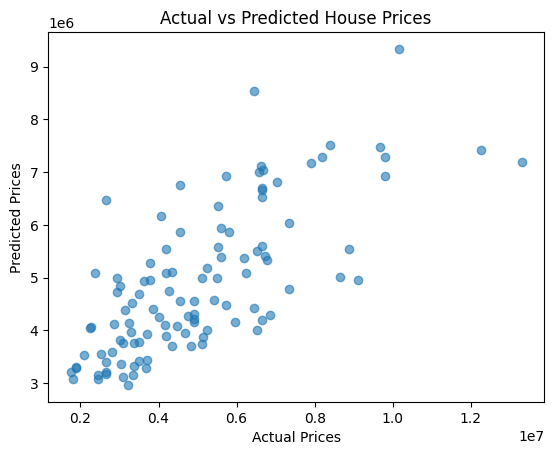

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.8)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()